In [14]:
import speech_recognition as sr

def record_audio():
    recognizer = sr.Recognizer()

    with sr.Microphone() as source:
        print("🎤 Speak now...")
        recognizer.adjust_for_ambient_noise(source)  # Adjust for background noise
        audio = recognizer.listen(source)  # Capture audio
        
        print("⏳ Processing audio...")

    try:
        # Convert speech to text using Google Speech API
        text = recognizer.recognize_google(audio)
        print("📝 Transcribed Text:", text)
        return text
    except sr.UnknownValueError:
        print("⚠️ Could not understand the audio.")
    except sr.RequestError:
        print("⚠️ Could not request results from Google Speech Recognition service.")

# Capture audio from microphone and transcribe
record_audio()

🎤 Speak now...
⏳ Processing audio...
📝 Transcribed Text: hello this is test Run 1


'hello this is test Run 1'

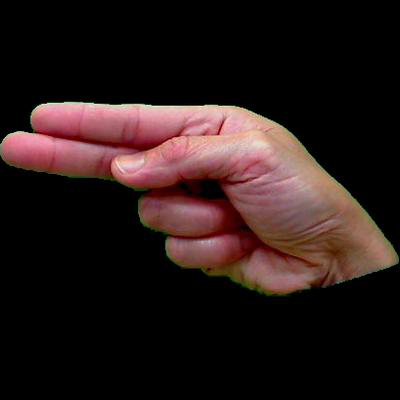

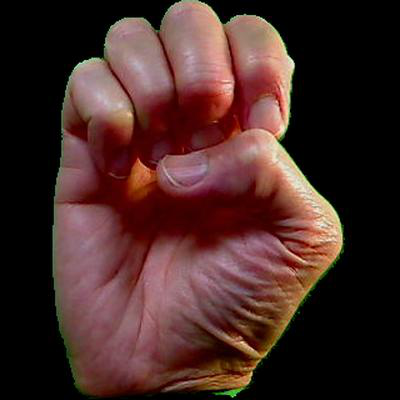

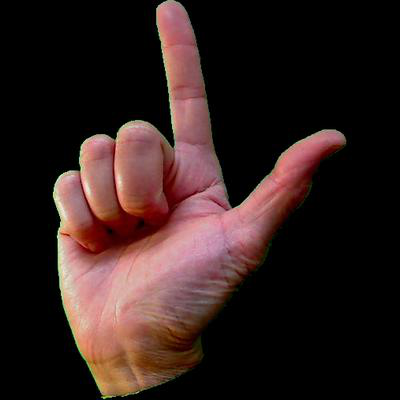

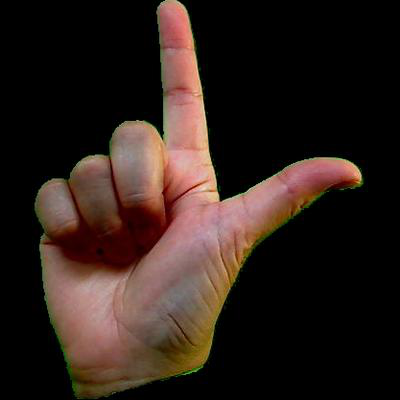

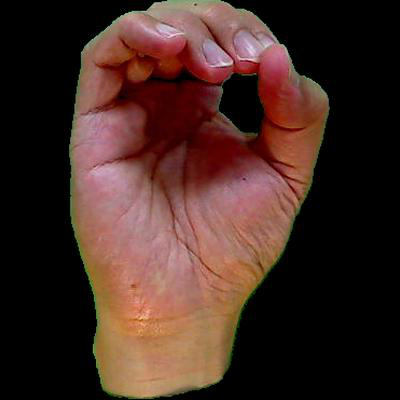

In [4]:
import os
import random
import cv2
from IPython.display import display, Image
from PIL import Image as PILImage

# Path to the dataset containing subfolders for each alphabet (A-Z)
SIGN_LANGUAGE_PATH = "C:/Users/onkar/Desktop/Onkar personal/Programming/projects/SignFlow/dataset 2/asl_dataset/"

def show_sign(letter):
    """Display a random sign language image for a given letter."""
    folder_path = os.path.join(SIGN_LANGUAGE_PATH, letter.upper())  # Convert to uppercase
    
    if os.path.exists(folder_path):
        images = os.listdir(folder_path)  # List all images in the folder
        
        if images:  # Ensure the folder is not empty
            img_path = os.path.join(folder_path, random.choice(images))  # Pick a random image
            
            img = PILImage.open(img_path)
            display(img)
        else:
            print(f"⚠️ No images found in '{letter}' folder.")
    else:
        print(f"⚠️ No folder found for '{letter}'")

def text_to_sign(transcribed_text):
    """Convert text to sign language by displaying corresponding images."""
    for letter in transcribed_text.replace(" ", ""):  # Remove spaces and process each letter
        show_sign(letter)

# Example usage
transcribed_text = "hello"
text_to_sign(transcribed_text)


🎤 Speak something...
📝 Transcribed Text: test Run 1


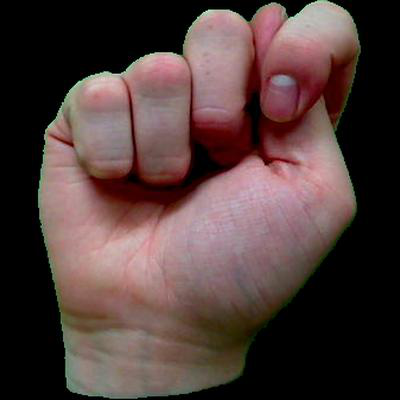

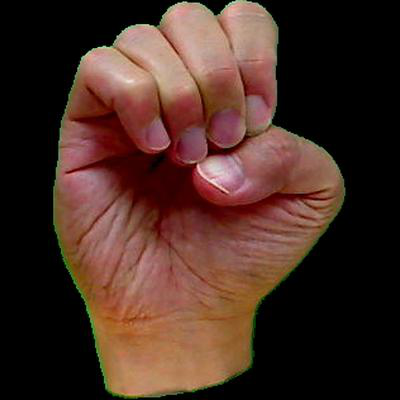

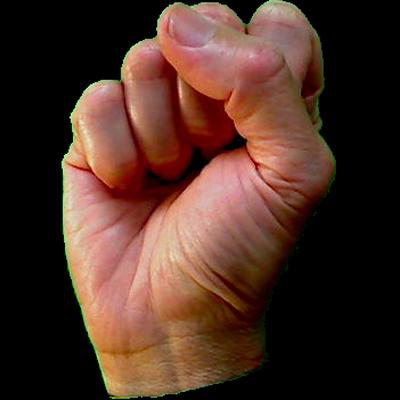

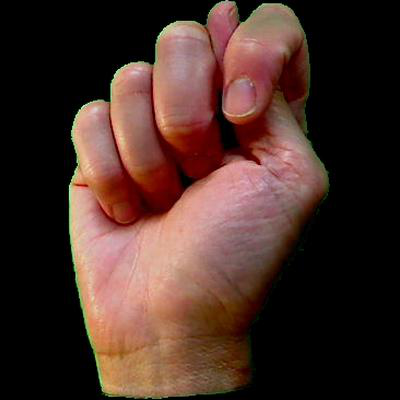

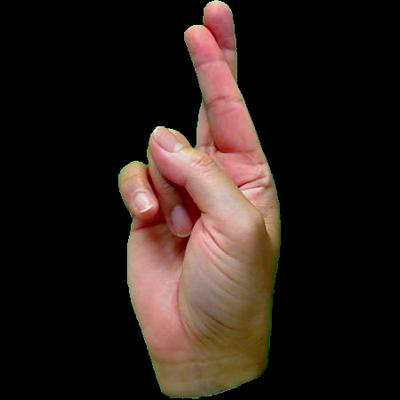

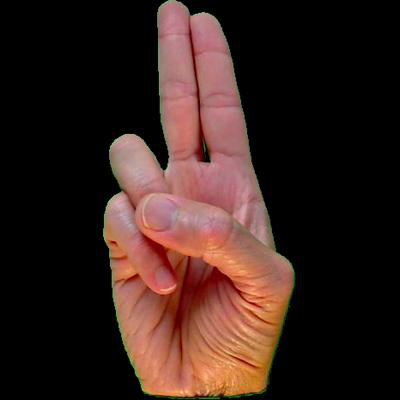

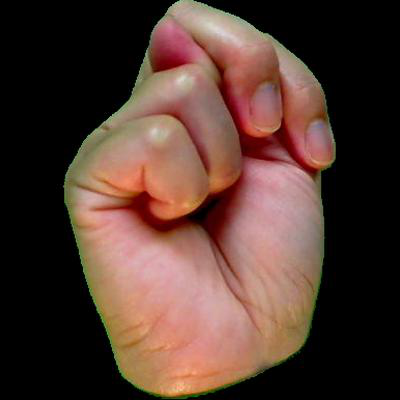

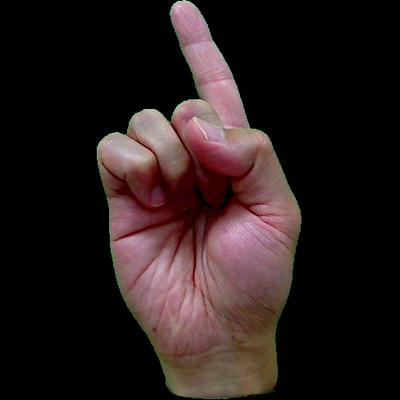

In [4]:
import os
import random
import speech_recognition as sr
from IPython.display import display
from PIL import Image as PILImage

# Path to the dataset containing subfolders for each alphabet (A-Z)
SIGN_LANGUAGE_PATH = "C:/Users/onkar/Desktop/Onkar personal/Programming/projects/SignFlow/dataset 2/asl_dataset/"

def show_sign(letter):
    """Display a random sign language image for a given letter."""
    folder_path = os.path.join(SIGN_LANGUAGE_PATH, letter.upper())  # Convert to uppercase
    
    if os.path.exists(folder_path):
        images = os.listdir(folder_path)  # List all images in the folder
        
        if images:  # Ensure the folder is not empty
            img_path = os.path.join(folder_path, random.choice(images))  # Pick a random image
            
            img = PILImage.open(img_path)
            display(img)
        else:
            print(f"⚠️ No images found in '{letter}' folder.")
    else:
        print(f"⚠️ No folder found for '{letter}'")

def text_to_sign(transcribed_text):
    """Convert text to sign language by displaying corresponding images."""
    for letter in transcribed_text.replace(" ", ""):  # Remove spaces and process each letter
        show_sign(letter)

def recognize_speech():
    """Capture speech input and convert it to text."""
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("🎤 Speak something...")
        recognizer.adjust_for_ambient_noise(source)  # Reduce noise
        try:
            audio = recognizer.listen(source, timeout=5)  # Listen for speech
            text = recognizer.recognize_google(audio)  # Convert to text
            print(f"📝 Transcribed Text: {text}")
            return text.lower()  # Convert to lowercase
        except sr.UnknownValueError:
            print("⚠️ Could not understand the audio.")
        except sr.RequestError:
            print("⚠️ Could not request results, check internet connection.")
        except sr.WaitTimeoutError:
            print("⚠️ No speech detected.")

    return None  # Return None if recognition fails

# 🛠️ Main Function
def main():
    transcribed_text = recognize_speech()
    if transcribed_text:
        text_to_sign(transcribed_text)

# Run the program
main()


🎤 Speak something...
📝 Transcribed Text: hi how are you


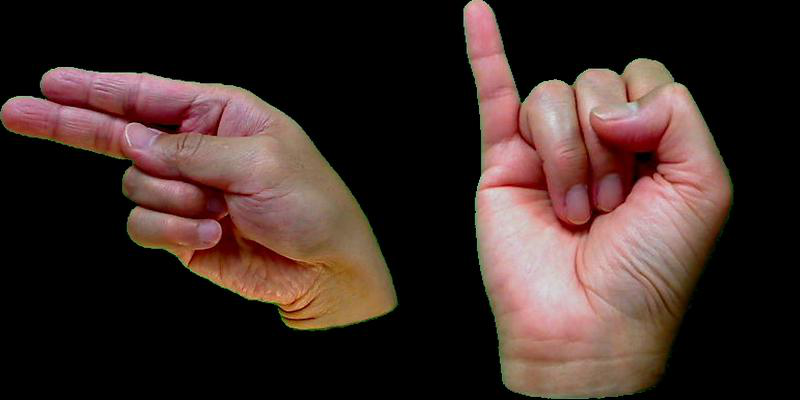

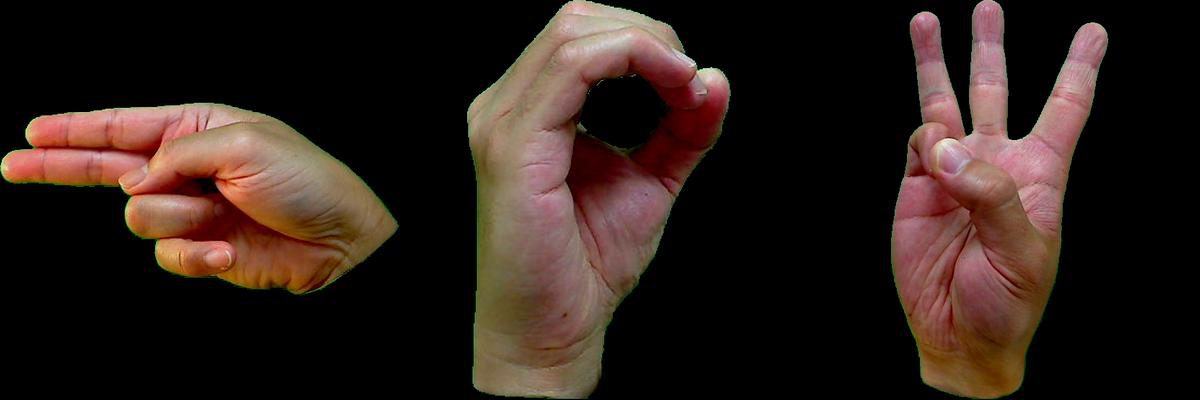

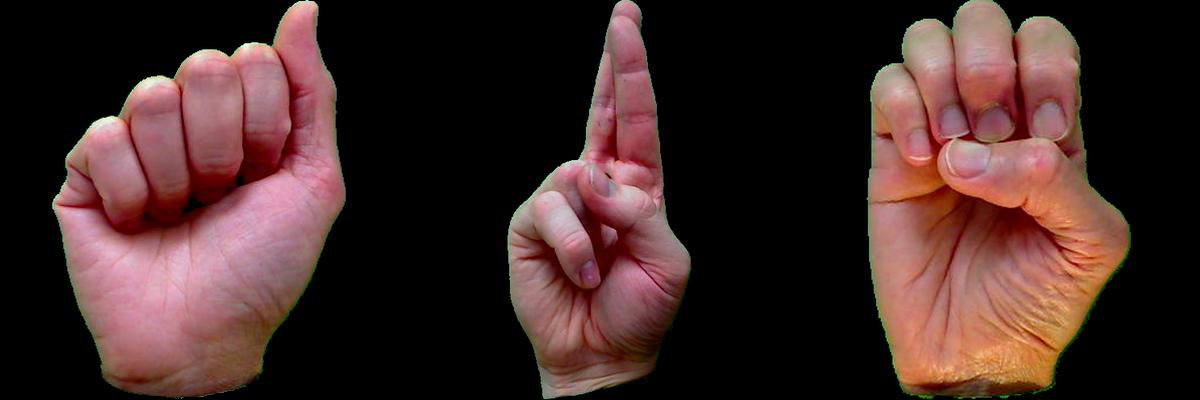

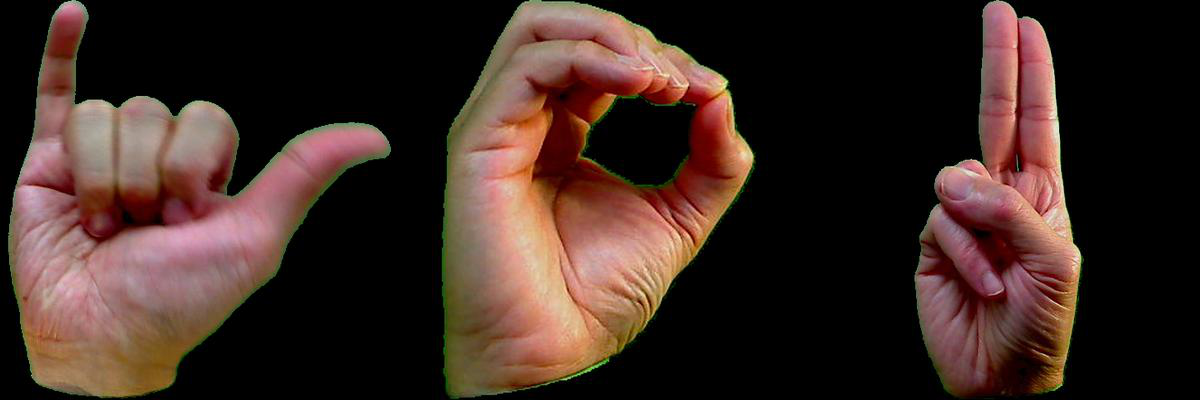

In [1]:
from PIL import Image as PILImage
from IPython.display import display
import os
import random
import speech_recognition as sr

SIGN_LANGUAGE_PATH = "C:/Users/onkar/Desktop/Onkar personal/Programming/projects/SignFlow/dataset 2/asl_dataset/"

def get_letter_image(letter):
    """Return a random image of the given letter."""
    folder_path = os.path.join(SIGN_LANGUAGE_PATH, letter.upper())
    if os.path.exists(folder_path):
        images = os.listdir(folder_path)
        if images:
            img_path = os.path.join(folder_path, random.choice(images))
            return PILImage.open(img_path)
    return None

def combine_images_horizontally(images):
    """Combine a list of PIL images horizontally."""
    widths, heights = zip(*(img.size for img in images))
    total_width = sum(widths)
    max_height = max(heights)
    
    combined_img = PILImage.new('RGB', (total_width, max_height), color=(255, 255, 255))

    x_offset = 0
    for img in images:
        combined_img.paste(img, (x_offset, 0))
        x_offset += img.width
    
    return combined_img

def text_to_sign(transcribed_text):
    """Display sign images grouped by words."""
    words = transcribed_text.split()
    
    for word in words:
        letter_imgs = []
        for letter in word:
            img = get_letter_image(letter)
            if img:
                letter_imgs.append(img)
        if letter_imgs:
            word_img = combine_images_horizontally(letter_imgs)
            display(word_img)

def recognize_speech():
    """Capture speech input and convert to text."""
    recognizer = sr.Recognizer()
    with sr.Microphone() as source:
        print("🎤 Speak something...")
        recognizer.adjust_for_ambient_noise(source)
        try:
            audio = recognizer.listen(source, timeout=5)
            text = recognizer.recognize_google(audio)
            print(f"📝 Transcribed Text: {text}")
            return text.lower()
        except sr.UnknownValueError:
            print("⚠️ Could not understand the audio.")
        except sr.RequestError:
            print("⚠️ Could not request results, check internet connection.")
        except sr.WaitTimeoutError:
            print("⚠️ No speech detected.")
    return None

def main():
    transcribed_text = recognize_speech()
    if transcribed_text:
        text_to_sign(transcribed_text)

main()